# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [16]:
#%pip install yellowbrick

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
data = datasets.load_wine()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [19]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [20]:
labels = kmeans.labels_
labels

array([3, 3, 1, 4, 2, 4, 1, 1, 3, 3, 4, 1, 1, 3, 4, 1, 1, 3, 4, 6, 2, 2,
       3, 3, 6, 6, 1, 1, 6, 3, 1, 4, 3, 1, 3, 6, 6, 3, 3, 2, 6, 3, 3, 2,
       6, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 7, 2, 7, 5, 0, 0, 2,
       7, 7, 2, 2, 6, 0, 7, 3, 6, 0, 0, 7, 2, 7, 0, 2, 5, 7, 7, 7, 7, 5,
       2, 5, 7, 7, 7, 0, 0, 6, 5, 0, 2, 0, 2, 5, 7, 0, 2, 0, 7, 7, 0, 2,
       5, 0, 5, 7, 0, 0, 7, 0, 0, 5, 5, 7, 0, 0, 0, 0, 0, 7, 0, 5, 5, 7,
       5, 5, 5, 2, 2, 7, 5, 5, 5, 2, 7, 5, 6, 6, 0, 5, 5, 5, 7, 7, 0, 2,
       5, 2, 7, 6, 2, 5, 7, 2, 5, 2, 5, 7, 2, 2, 2, 5, 7, 7, 2, 2, 2, 6,
       6, 5], dtype=int32)

In [21]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.5406824747857603

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [23]:
labels = kmeans.labels_
labels

array([0, 0, 0, 3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 2, 2,
       0, 0, 2, 2, 0, 3, 2, 0, 3, 3, 0, 3, 0, 2, 2, 0, 0, 2, 2, 0, 0, 4,
       2, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 2, 4, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 2, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 1, 4, 2, 2, 1, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 1, 2, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 2, 4, 1, 1, 4, 2, 2, 2,
       2, 4], dtype=int32)

In [24]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [26]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [27]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

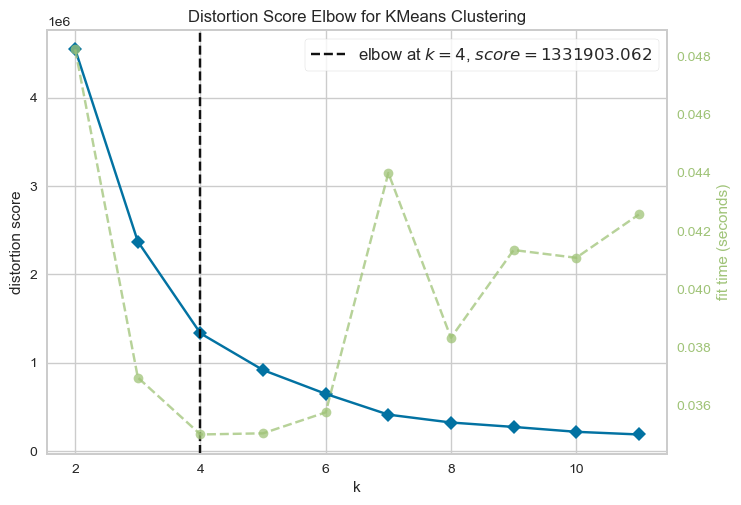

In [28]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12), metric='distortion', timings=True, verbose=False)

visualizer.fit(X)
visualizer.show();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

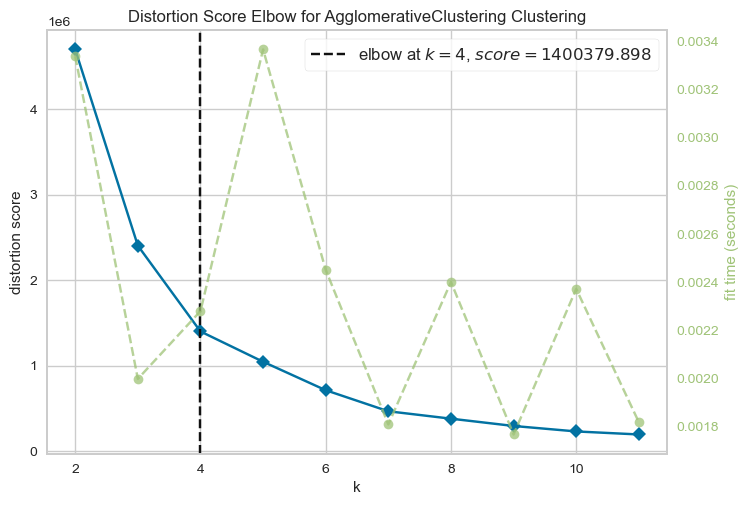

In [29]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2, 12), metric='distortion', timings=True)

visualizer.fit(X)

visualizer.show();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [32]:
k = 4
model = AgglomerativeClustering(n_clusters=k)
cluster_labels = model.fit_predict(X)

In [34]:
X['Cluster'] = cluster_labels
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Cluster  
0                          3.92   1065.0        3  
1                          3.40   1050.0        3  
2                          3.17   1185.0        3  
3                          3.45   1480.0        1  
4                          2.93    735.0        2

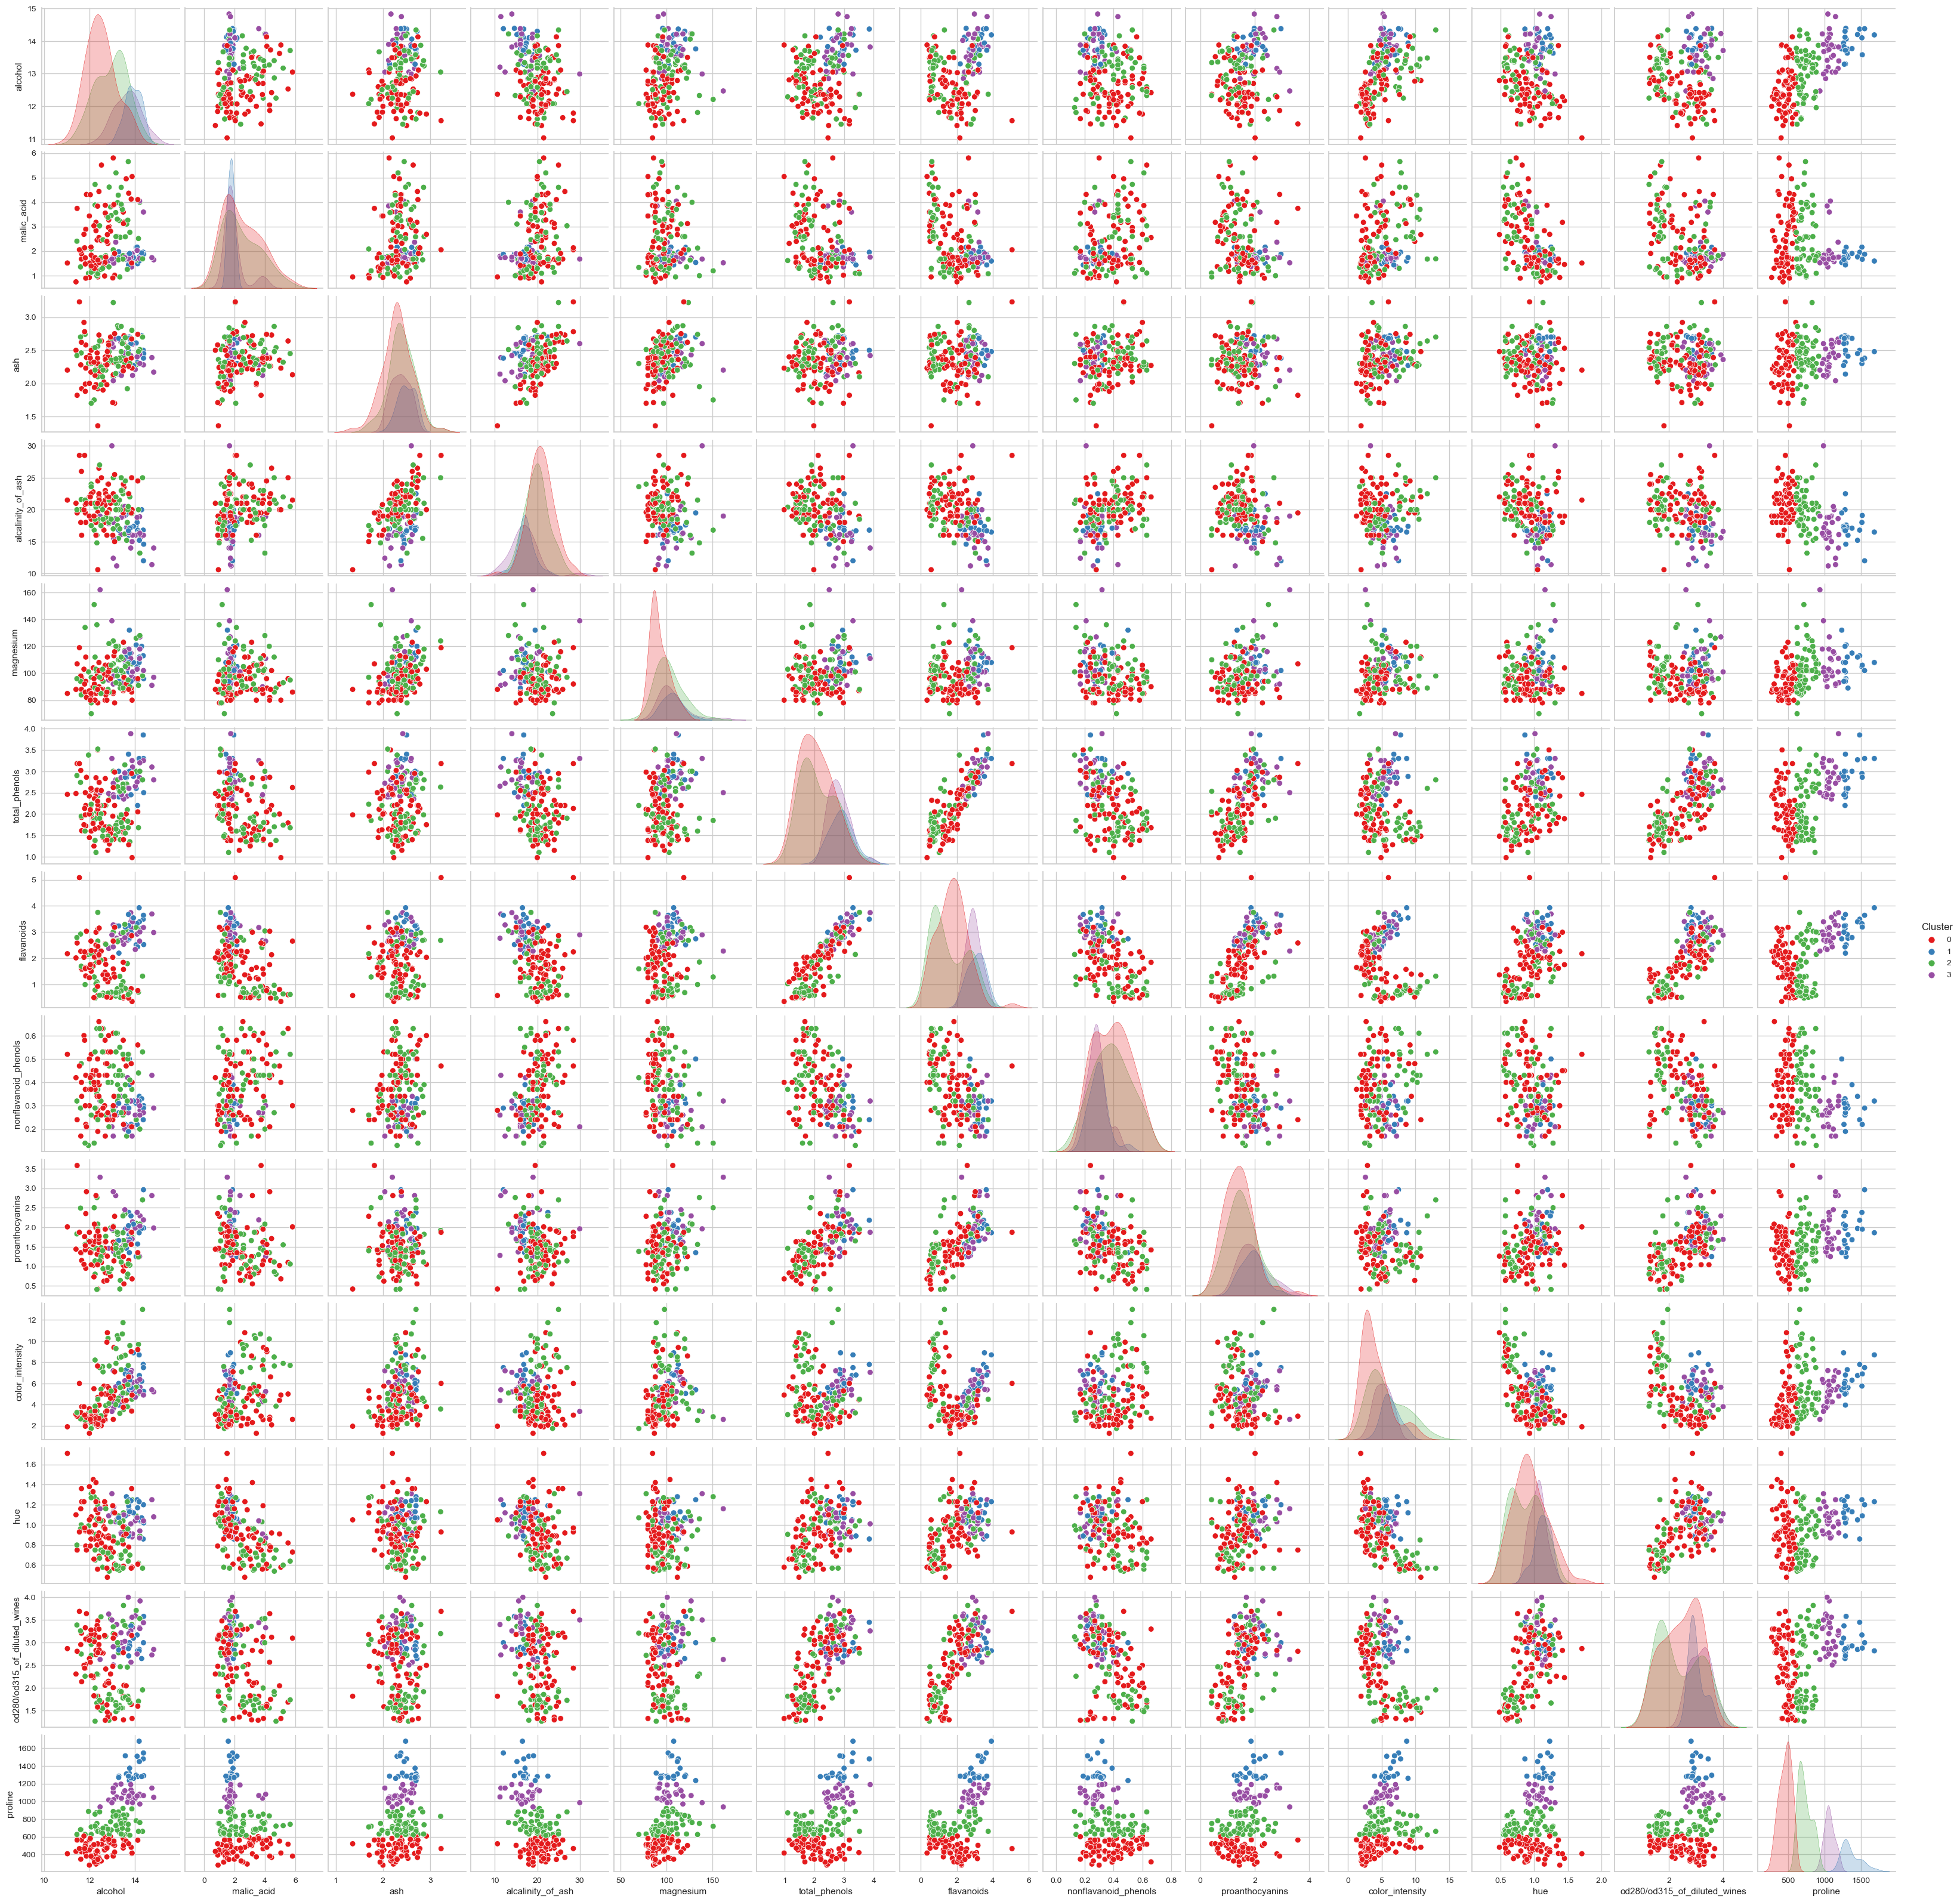

In [37]:
sns.pairplot(X, hue='Cluster', palette='Set1')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [42]:
features = X.drop('Cluster',axis=1)

In [43]:
features.shape

(178, 13)

In [44]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

In [46]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X['Cluster']

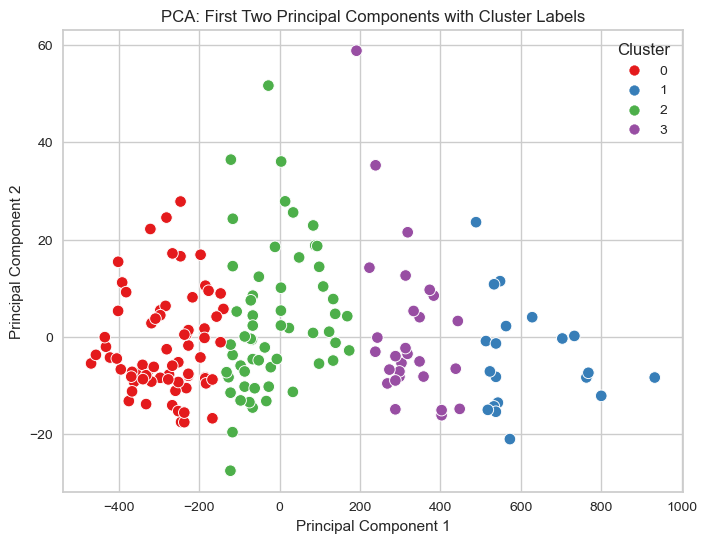

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=70)
plt.title('PCA: First Two Principal Components with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [49]:
perplexities = [5, 10, 20, 30, 50]

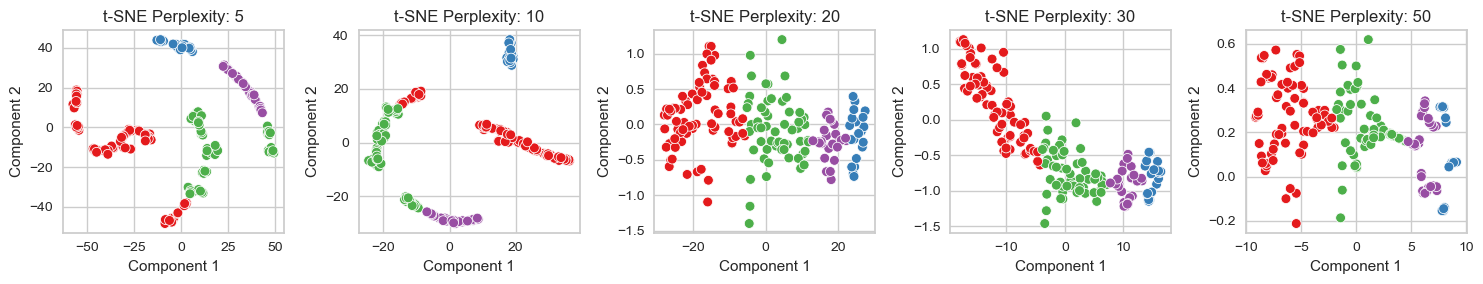

In [51]:
plt.figure(figsize=(15, 3))
for i, perplexity in enumerate(perplexities):
    # Apply t-SNE with the current perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_components = tsne.fit_transform(features)
    
    # Create a DataFrame for the t-SNE components with cluster labels
    tsne_df = pd.DataFrame(data=tsne_components, columns=['Component 1', 'Component 2'])
    tsne_df['Cluster'] = X['Cluster']
    
    # Create subplots
    plt.subplot(1, len(perplexities), i+1)
    sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Cluster', palette='Set1', s=50)
    plt.title(f"t-SNE Perplexity: {perplexity}")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend().remove()

plt.tight_layout()
plt.show()